<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW5/HW5Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)

# **Pre-processing and Training**


> **Separating desired Features and Outputs**


In [37]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = hf.pop('price')
x = hf[features].values

t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_u = torch.tensor(x, dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)


> **Splitting Training and Validation Set**


In [38]:
samples = t_un.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]



> **Linear Regression Training**




In [39]:
def lin_model(t_u, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss}, \tValidation Loss: {valid_loss}')
  return params, train_losses, valid_losses

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [40]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 1000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 1500, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 2000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 2500, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 3000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 3500, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 4000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 4500, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0
Epochs: 5000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295754461184.0


> *Trained with LR of* ***1e-2***

In [41]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 1595143225344.0, 	Validation Loss: 1295963127808.0
Epochs: 1000, 	Training Loss: 1595141652480.0, 	Validation Loss: 1295756820480.0
Epochs: 1500, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 2000, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 2500, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 3000, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 3500, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 4000, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 4500, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0
Epochs: 5000, 	Training Loss: 1595141783552.0, 	Validation Loss: 1295756427264.0


> *Trained with LR of* ***1e-3***

In [42]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4714160193536.0, 	Validation Loss: 4947545948160.0
Epochs: 1000, 	Training Loss: 2025629810688.0, 	Validation Loss: 1916026224640.0
Epochs: 1500, 	Training Loss: 1657868255232.0, 	Validation Loss: 1425515610112.0
Epochs: 2000, 	Training Loss: 1605004689408.0, 	Validation Loss: 1330611224576.0
Epochs: 2500, 	Training Loss: 1596879405056.0, 	Validation Loss: 1307385528320.0
Epochs: 3000, 	Training Loss: 1595494629376.0, 	Validation Loss: 1300256653312.0
Epochs: 3500, 	Training Loss: 1595224227840.0, 	Validation Loss: 1297676894208.0
Epochs: 4000, 	Training Loss: 1595163279360.0, 	Validation Loss: 1296635658240.0
Epochs: 4500, 	Training Loss: 1595147681792.0, 	Validation Loss: 1296182149120.0
Epochs: 5000, 	Training Loss: 1595143487488.0, 	Validation Loss: 1295973351424.0


> *Trained with LR of* ***1e-4***

In [43]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 21392552624128.0, 	Validation Loss: 22004860190720.0
Epochs: 1000, 	Training Loss: 17618907955200.0, 	Validation Loss: 18235862810624.0
Epochs: 1500, 	Training Loss: 14590225154048.0, 	Validation Loss: 15185626529792.0
Epochs: 2000, 	Training Loss: 12152120279040.0, 	Validation Loss: 12708966563840.0
Epochs: 2500, 	Training Loss: 10184280768512.0, 	Validation Loss: 10692247683072.0
Epochs: 3000, 	Training Loss: 8592368861184.0, 	Validation Loss: 9045878505472.0
Epochs: 3500, 	Training Loss: 7302020595712.0, 	Validation Loss: 7698849464320.0
Epochs: 4000, 	Training Loss: 6254313340928.0, 	Validation Loss: 6594536931328.0
Epochs: 4500, 	Training Loss: 5402351108096.0, 	Validation Loss: 5687588421632.0
Epochs: 5000, 	Training Loss: 4708659363840.0, 	Validation Loss: 4941507198976.0


# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [44]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 23496056897536.0, 	Validation Loss: 24031765987328.0
Epochs: 1000, 	Training Loss: 21153401798656.0, 	Validation Loss: 21655673896960.0
Epochs: 1500, 	Training Loss: 19005123330048.0, 	Validation Loss: 19473234919424.0
Epochs: 2000, 	Training Loss: 17035571494912.0, 	Validation Loss: 17468787523584.0
Epochs: 2500, 	Training Loss: 15232037552128.0, 	Validation Loss: 15629632405504.0
Epochs: 3000, 	Training Loss: 13584296837120.0, 	Validation Loss: 13945554337792.0
Epochs: 3500, 	Training Loss: 12084111736832.0, 	Validation Loss: 12408339824640.0
Epochs: 4000, 	Training Loss: 10724768219136.0, 	Validation Loss: 11011323068416.0
Epochs: 4500, 	Training Loss: 9500645916672.0, 	Validation Loss: 9748947664896.0
Epochs: 5000, 	Training Loss: 8406840639488.0, 	Validation Loss: 8616399077376.0


> *Trained with LR of* ***1e-2***

In [45]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 25781669462016.0, 	Validation Loss: 26346795302912.0
Epochs: 1000, 	Training Loss: 25518344765440.0, 	Validation Loss: 26080224215040.0
Epochs: 1500, 	Training Loss: 25257104637952.0, 	Validation Loss: 25815731404800.0
Epochs: 2000, 	Training Loss: 24997835833344.0, 	Validation Loss: 25553195237376.0
Epochs: 2500, 	Training Loss: 24740439785472.0, 	Validation Loss: 25292517146624.0
Epochs: 3000, 	Training Loss: 24484832608256.0, 	Validation Loss: 25033625829376.0
Epochs: 3500, 	Training Loss: 24230949289984.0, 	Validation Loss: 24776435302400.0
Epochs: 4000, 	Training Loss: 23978754179072.0, 	Validation Loss: 24520916205568.0
Epochs: 4500, 	Training Loss: 23728186458112.0, 	Validation Loss: 24267016110080.0
Epochs: 5000, 	Training Loss: 23479231447040.0, 	Validation Loss: 24014711947264.0


> *Trained with LR of* ***1e-3***

In [46]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 26020075798528.0, 	Validation Loss: 26588106194944.0
Epochs: 1000, 	Training Loss: 25993444065280.0, 	Validation Loss: 26561151500288.0
Epochs: 1500, 	Training Loss: 25966833303552.0, 	Validation Loss: 26534213582848.0
Epochs: 2000, 	Training Loss: 25940237221888.0, 	Validation Loss: 26507296636928.0
Epochs: 2500, 	Training Loss: 25913668403200.0, 	Validation Loss: 26480400662528.0
Epochs: 3000, 	Training Loss: 25887114264576.0, 	Validation Loss: 26453525659648.0
Epochs: 3500, 	Training Loss: 25860579000320.0, 	Validation Loss: 26426663239680.0
Epochs: 4000, 	Training Loss: 25834056318976.0, 	Validation Loss: 26399819694080.0
Epochs: 4500, 	Training Loss: 25807550414848.0, 	Validation Loss: 26372988731392.0
Epochs: 5000, 	Training Loss: 25781059190784.0, 	Validation Loss: 26346174545920.0


> *Trained with LR of* ***1e-4***

In [47]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 26044016885760.0, 	Validation Loss: 26612336689152.0
Epochs: 1000, 	Training Loss: 26041349308416.0, 	Validation Loss: 26609637654528.0
Epochs: 1500, 	Training Loss: 26038685925376.0, 	Validation Loss: 26606938619904.0
Epochs: 2000, 	Training Loss: 26036016250880.0, 	Validation Loss: 26604237488128.0
Epochs: 2500, 	Training Loss: 26033350770688.0, 	Validation Loss: 26601542647808.0
Epochs: 3000, 	Training Loss: 26030683193344.0, 	Validation Loss: 26598845710336.0
Epochs: 3500, 	Training Loss: 26028019810304.0, 	Validation Loss: 26596144578560.0
Epochs: 4000, 	Training Loss: 26025352232960.0, 	Validation Loss: 26593443446784.0
Epochs: 4500, 	Training Loss: 26022686752768.0, 	Validation Loss: 26590748606464.0
Epochs: 5000, 	Training Loss: 26020023369728.0, 	Validation Loss: 26588051668992.0


# **Linear Regression Loss Plots**


>**SGD Optimized Linear Model**


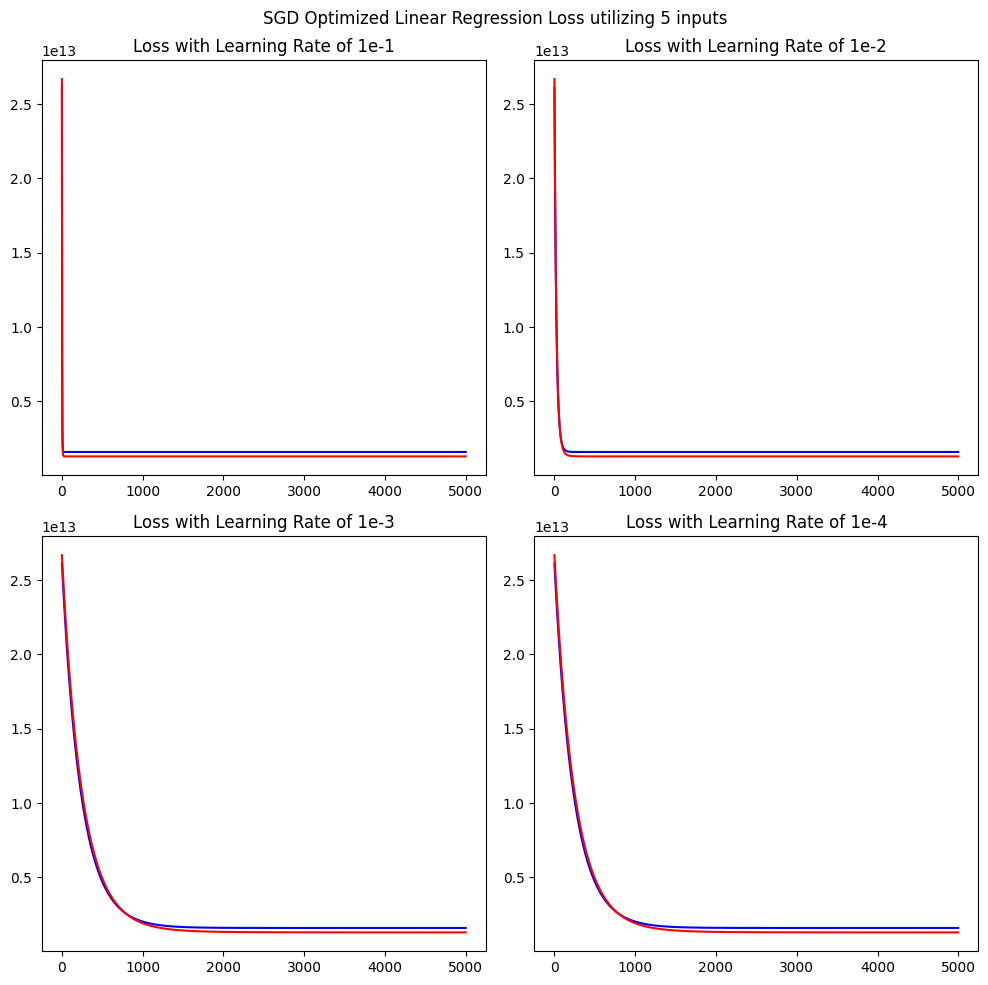

In [48]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()



> **Adam Optimized Linear Model**



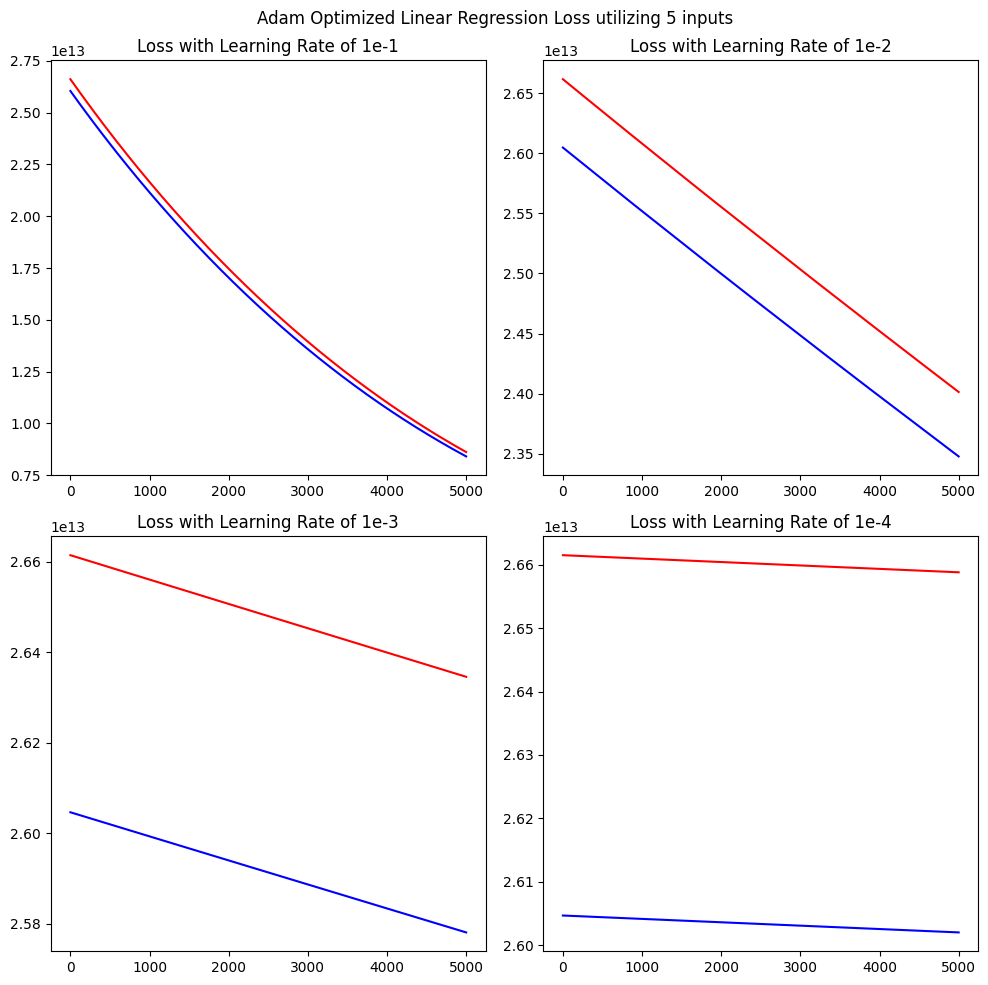

In [49]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()